# **Start with looking at pfas – later on we can think of adding new chemicals**
**Even just looking at PFAS could be substantial enough
If we went through PFAS and tried a lot of different classification levels and compared them –for just binary, and beyond that the continuous exposure level** 

**Rand forest**

**NN**

**Lasso regression**


# setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [ ]:
!pip install xport

In [ ]:
#NAIMAN'S ORIGINAL CODE
# create dictionary of data frames indexed by file names
#
import re
import os
import xport #
import pandas as pd
import numpy as np

L=os.listdir()
L=[x for x in L if re.search("_H.XPT",x)]
df={}
fnames=[]
for x in L:
    #print(x)
    with open(x,"rb") as fin:
        y=x.replace(".XPT","")
        dt=xport.to_dataframe(fin)
        if 'SEQN' in dt.columns:
            fnames.append(x.replace(".XPT",""))
            df[y]=dt
print(len(fnames))

17


#PFAS dataframe

In [ ]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS=df_PFAS.drop(columns = 'WTSB2YR') #drop weight
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

In [ ]:
display(df_PFAS)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.5,0.0,0.10,0.0,0.07,1.0
1,73571.0,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,1.3,0.0,0.07,1.0,0.07,1.0
2,73574.0,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,0.0,0.07,1.0,0.07,1.0
3,73576.0,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,0.6,0.0,0.07,1.0,0.10,0.0
4,73577.0,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.3,0.0,0.07,1.0,0.07,1.0
2334,83712.0,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.5,0.0,0.07,1.0,0.07,1.0
2335,83713.0,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,1.5,0.0,0.50,0.0,0.30,0.0
2336,83717.0,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.8,0.0,0.07,1.0,0.07,1.0


#making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

# d_p_dropna = dictionary of detect percent, omitting the Nan values

In [ ]:
#df['AMDGYD_H']
#print(fnames)
d_p = {}
d_p_dropna = {}
for name in fnames:
  # for each chemical , create df with only 'LC' cols
  n = df[name].loc[:,df[name].columns.str.endswith('LC')]
  # get percentage 
  for column in n:
    p = round(((n[column][n[column]==0].count())/len(n))*100,2)
    d_p[column] = p
    p_dropna = round(((n[column][n[column]==0].count())/len(n[column].dropna()))*100,2)
    d_p_dropna[column] = p_dropna


In [ ]:
#removing what is not a comment code, but just ends with 'LC'
d_p.pop("URXTLC")
d_p_dropna.pop("URXTLC")

0.0

In [ ]:
d_p_dropna

{'LBD2DFLC': 18.39,
 'LBD4CELC': 0.0,
 'LBDACRLC': 100.0,
 'LBDBCDLC': 71.01,
 'LBDBGELC': 0.83,
 'LBDBGMLC': 74.49,
 'LBDBMNLC': 100.0,
 'LBDBPBLC': 100.0,
 'LBDBSELC': 100.0,
 'LBDEOALC': 96.5,
 'LBDFORLC': 100.0,
 'LBDGLYLC': 100.0,
 'LBDIHGLC': 17.39,
 'LBDPFLLC': 86.75,
 'LBDTHGLC': 74.32,
 'LBDV06LC': 2.22,
 'LBDV07LC': 1.87,
 'LBDV08LC': 1.22,
 'LBDV1DLC': 0.0,
 'LBDV2ALC': 1.5,
 'LBDV3BLC': 0.0,
 'LBDV4CLC': 7.47,
 'LBDVBFLC': 5.48,
 'LBDVBMLC': 12.09,
 'LBDVBZLC': 24.98,
 'LBDVC6LC': 1.7,
 'LBDVCBLC': 0.03,
 'LBDVCFLC': 48.92,
 'LBDVCMLC': 10.39,
 'LBDVCTLC': 0.03,
 'LBDVDBLC': 43.76,
 'LBDVDELC': 0.0,
 'LBDVDXLC': 0.0,
 'LBDVEALC': 1.56,
 'LBDVEBLC': 27.27,
 'LBDVECLC': 0.38,
 'LBDVEELC': 0.2,
 'LBDVFNLC': 14.83,
 'LBDVFTLC': 0.0,
 'LBDVHTLC': 0.84,
 'LBDVIPLC': 0.19,
 'LBDVMCLC': 0.16,
 'LBDVMELC': 2.35,
 'LBDVMPLC': 1.69,
 'LBDVNBLC': 0.0,
 'LBDVOXLC': 26.97,
 'LBDVTCLC': 0.58,
 'LBDVTELC': 0.53,
 'LBDVTOLC': 95.81,
 'LBDVTPLC': 0.03,
 'LBDVVBLC': 0.0,
 'LBDVXYLC': 63.52,
 

In [ ]:
len(d_p)

131

In [ ]:
#np.percentile(np.array(list(d_p.items())),[0,25,50,75,100])

In [ ]:
type(d_p)
L2=np.array(list(d_p.items()))

#Decide which we can treat as binary


In [ ]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p_dropna.items() if (val <= 30 or val >= 70)}

In [ ]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
for key in df:
    binary_cols = df[key].loc[:,df[key].columns.str.endswith('LC')]
    binary_dataset[key] = binary_cols


In [ ]:
binary_list = []
for key in binary_dataset:
  binary_dataset[key].dropna()
  binary_list.append(binary_dataset[key])


In [ ]:
len(binary_list)

17

In [ ]:
binary_df = pd.concat(binary_dataset.values())
binary_df.head()

,LBD2DFLC,LBD4CELC,LBDV06LC,LBDV07LC,LBDV08LC,LBDV1DLC,LBDV2ALC,LBDV3BLC,LBDV4CLC,LBDVBFLC,...,LBDBSELC,LBDBMNLC,LBDFORLC,URDDEELC,URDDEALC,URDDHDLC,LBDEOALC,LBDPFLLC,LBDACRLC,LBDGLYLC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'LBDBSELC', 'LBDBMNLC', 'LBDFORLC', 'URDDEELC', 'URDDEALC', 'URDDHDLC',
       'LBDEOALC', 'LBDPFLLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=132)

In [ ]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

In [ ]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'LBDBSELC', 'LBDBMNLC', 'LBDFORLC', 'URDDEELC', 'URDDEALC', 'URDDHDLC',
       'LBDEOALC', 'LBDPFLLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=132)

#which of the chemicals do we have that we will treat as binary in our model?
#removing the continuous version of it

In [ ]:
intersection_set = set.intersection(set(df_PFAS.columns), set(binary_df.columns))
intersection_list = list(intersection_set)

In [ ]:
print(len(intersection_list))

0


In [ ]:
intersection_list

[]

In [ ]:
#percentage of what is binary in df
len(intersection_list)/len(df_PFAS)*100

0.0

In [ ]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [ ]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)

0

In [ ]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
df_PFAS=df_PFAS.drop(columns=cols_to_drop)

#Splitting the data
We are trying to predict detect or not of Perfluorodecanoic acid (ug/L)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_PFAS, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']
Y_test=test['LBDPFDEL']

In [ ]:
include=list(X_train.columns)

#logistic regression for only PFAS group

In [ ]:
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict_proba(X_test)
prediction = [round(value) for value in y_pred[:,1]]
score = metrics.accuracy_score(Y_test, predictions)
print(score)

0.7649769585253456


In [ ]:
#the actual probability of detection
print(Y_test.value_counts())
336/(336+98)


0.0    332
1.0    102
Name: LBDPFDEL, dtype: int64


0.7741935483870968

In [ ]:
predictions = [round(value) for value in prediction]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.7649769585253456


In [ ]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[332   0]
 [102   0]]


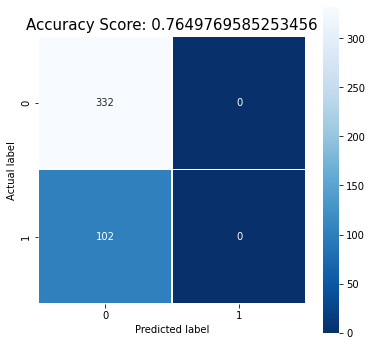

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

the predictor label is always 0 here. 
might as well be random guessing

##Roc curve

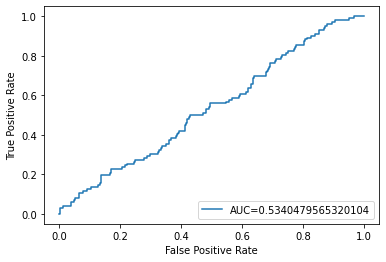

In [ ]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# AUC = 0.5, need to improve model accuracy 

#Stepwise Logistic Regression

## stepwise regression (feature one)

In [ ]:
include=list(X_train.columns)

In [ ]:
import statsmodels.api as sm
#testing out for one at a time before creating loop
log_reg=sm.Logit(Y_train,X_train[include[0]]).fit()
#see it all
print(log_reg.summary())
#see log likelihood
print(log_reg.llf)
loglik =log_reg.llf
#BIC calculation (math.log with one arguement is natural log)
bic = (1 * math.log(len(Y_test))) - (2 * loglik)
print(bic)
#the built in bic is slightly different, we will stay with ours
log_reg.bic


Optimization terminated successfully.
         Current function value: 0.505165
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDPFDEL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1733
Method:                           MLE   Df Model:                            0
Date:                Wed, 16 Mar 2022   Pseudo R-squ.:               0.0003056
Time:                        20:55:57   Log-Likelihood:                -875.96
converged:                       True   LL-Null:                       -876.22
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SEQN       -1.735e-05   7.59e-07    -22.868      0.000   -1.88e-05   -1.59e-05
-875.9560974132601
1757.98523

1759.3703809838605

In [ ]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict= {}
loglik_dict= {}
causes_error=[]
#for loop for the first to include
for i in include:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[i]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict[i]=bic
    loglik_dict[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.505165
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.502034
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.690898
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547713
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.609000
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.506117
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.506967
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.506336
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545778
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.385959
  

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [ ]:
#looking at all the bic scores
bic_dict

{'LBDMPAHL': 2118.0836483131566,
 'LBDPFBSL': 1764.236257732192,
 'LBDPFDOL': 1899.7897127156784,
 'LBDPFHPL': 1898.8301670567134,
 'LBDPFHSL': 2402.1076679343714,
 'LBDPFNAL': 2394.003957586292,
 'LBDPFUAL': 2334.0873821030727,
 'LBXMPAH': 1905.542297211386,
 'LBXPFBS': 1761.2874650441904,
 'LBXPFDO': 1828.0777660682852,
 'LBXPFHP': 1762.0447661941607,
 'LBXPFHS': 1747.1254612756711,
 'LBXPFNA': 1344.5782190398202,
 'LBXPFUA': 1458.6496298025227,
 'SEQN': 1757.9852393606207}

In [ ]:
#looking at all the log likelihoods
loglik_dict

{'LBDMPAHL': -1056.005301889528,
 'LBDPFBSL': -879.0816065990457,
 'LBDPFDOL': -946.858334090789,
 'LBDPFHPL': -946.3785612613065,
 'LBDPFHSL': -1198.0173117001355,
 'LBDPFNAL': -1193.9654565260957,
 'LBDPFUAL': -1164.007168784486,
 'LBXMPAH': -949.7346263386428,
 'LBXPFBS': -877.607210255045,
 'LBXPFDO': -911.0023607670923,
 'LBXPFHP': -877.9858608300301,
 'LBXPFHS': -870.5262083707853,
 'LBXPFNA': -669.2525872528598,
 'LBXPFUA': -726.2882926342111,
 'SEQN': -875.9560974132601}

In [ ]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))],min(bic_dict.values()),loglik_dict[list(loglik_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))]])

LBXPFNA 1344.5782190398202 -669.2525872528598


In [ ]:
log_reg=sm.Logit(Y_train,X_train['LBXPFNA']).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.385959
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               LBDPFDEL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1733
Method:                           MLE   Df Model:                            0
Date:                Wed, 16 Mar 2022   Pseudo R-squ.:                  0.2362
Time:                        20:55:57   Log-Likelihood:                -669.25
converged:                       True   LL-Null:                       -876.22
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -2.5713      0.115    -22.393      0.000      -2.796      -2.346


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf=model.fit(X_train[['LBXPFNA']],Y_train)
prediction = clf.predict_proba(X_test[['LBXPFNA']])
score = model.score(X_test[['LBXPFNA']],Y_test)
print(score)

0.8456221198156681


In [ ]:
predictions = [round(value) for value in prediction[:,1]]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.8456221198156681


In [ ]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[310  22]
 [ 45  57]]


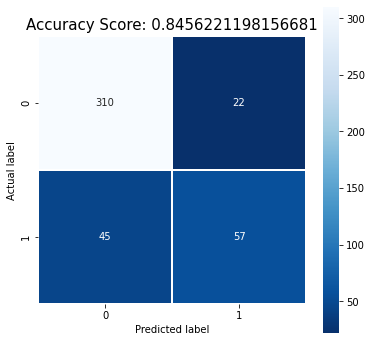

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Stepwise Regression (feature 2)

In [ ]:
#we make a new list without the feature we are already using, and removing the chemicals that create singular matrix issues
#(which is Perfluorononanoic acid (ug/L) detection level)
include_2=list(X_train.drop(columns=['LBXPFNA']).columns)

In [ ]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_2= {}
loglik_dict_2= {}
causes_error_2=[]
#for loop for the second to include
for i in include_2:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[['LBXPFNA',i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_2[i]=bic
    loglik_dict_2[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_2.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.344383
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.385295
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.382362
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.385809
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.371107
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.347256
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.344676
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.371913
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.353152
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.380440
  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
causes_error_2

[]

In [ ]:
#looking at all the bic scores
bic_dict_2

{'LBDMPAHL': 1293.0724133434187,
 'LBDPFBSL': 1201.409813926265,
 'LBDPFDOL': 1255.257223859644,
 'LBDPFHPL': 1230.8050884803304,
 'LBDPFHSL': 1332.1049558699779,
 'LBDPFNAL': 1325.4391890038746,
 'LBDPFUAL': 1084.9795779990764,
 'LBXMPAH': 1344.058894096091,
 'LBXPFBS': 1210.3563261034049,
 'LBXPFDO': 1350.5351735667946,
 'LBXPFHP': 1295.8659142788051,
 'LBXPFHS': 1342.2752467521686,
 'LBXPFUA': 1335.5146623005785,
 'SEQN': 1200.3946766507165}

In [ ]:
#looking at all the log likelihoods
loglik_dict_2

{'LBDMPAHL': -643.4996844046591,
 'LBDPFBSL': -597.6683846960823,
 'LBDPFDOL': -624.5920896627717,
 'LBDPFHPL': -612.3660219731149,
 'LBDPFHSL': -663.0159556679387,
 'LBDPFNAL': -659.683072234887,
 'LBDPFUAL': -539.4532667324879,
 'LBXMPAH': -668.9929247809953,
 'LBXPFBS': -602.1416407846522,
 'LBXPFDO': -672.231064516347,
 'LBXPFHP': -644.8964348723523,
 'LBXPFHS': -668.1011011090341,
 'LBXPFUA': -664.720808883239,
 'SEQN': -597.160816058308}

In [ ]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))],min(bic_dict_2.values()),loglik_dict_2[list(loglik_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))]])

LBDPFUAL 1084.9795779990764 -539.4532667324879


In [ ]:
log_reg=sm.Logit(Y_train,X_train[['LBXPFNA','LBDPFUAL']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.311103
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               LBDPFDEL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1732
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Mar 2022   Pseudo R-squ.:                  0.3843
Time:                        20:55:59   Log-Likelihood:                -539.45
converged:                       True   LL-Null:                       -876.22
Covariance Type:            nonrobust   LLR p-value:                1.696e-148
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -5.6246      0.336    -16.742      0.000      -6.283      -4.966
LBDPFUAL       2.2082      0.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf=model.fit(X_train[['LBXPFNA','LBDPFUAL']],Y_train)
prediction = clf.predict_proba(X_test[['LBXPFNA','LBDPFUAL']])
score = model.score(X_test[['LBXPFNA','LBDPFUAL']],Y_test)
print(score)

0.8502304147465438


In [ ]:
predictions = [round(value) for value in prediction[:,1]]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.8502304147465438


In [ ]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[312  20]
 [ 45  57]]


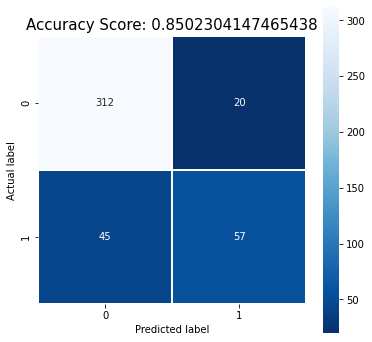

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Stepwise Regression (feature 3)




In [ ]:
#we make a new list without the feature we are already using 
#(which is Perfluoroundecanoic comment a.k.a binary detect or not)
include_3=list(X_train.drop(columns=['LBXPFNA','LBDPFUAL']).columns)

In [ ]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_3= {}
loglik_dict_3= {}
causes_error_3=[]
#for loop for the second to include
for i in include_3:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train[['LBXPFNA','LBDPFUAL',i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_3[i]=bic
    loglik_dict_3[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_3.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.309228
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.310912
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.311103
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.310527
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.311090
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.309895
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.309560
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.309405
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.311079
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.310985
  

In [ ]:
causes_error_3

[]

In [ ]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
#this got annoying to change so made a function
def bic_loglik(bicdictionary,loglikedictionary):
  return list(bicdictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))],min(bicdictionary.values()),loglikedictionary[list(loglik_dict_2.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))]]

In [ ]:
print(bic_loglik(bic_dict_3,loglik_dict_3))

('LBXPFUA', 1076.9597238148722, -535.4433396403858)


In [ ]:
log_reg=sm.Logit(Y_train,X_train[['LBXPFNA','LBDPFUAL','LBXPFBS']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.309895
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               LBDPFDEL   No. Observations:                 1734
Model:                          Logit   Df Residuals:                     1731
Method:                           MLE   Df Model:                            2
Date:                Wed, 16 Mar 2022   Pseudo R-squ.:                  0.3867
Time:                        20:56:00   Log-Likelihood:                -537.36
converged:                       True   LL-Null:                       -876.22
Covariance Type:            nonrobust   LLR p-value:                6.797e-148
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -5.1867      0.398    -13.043      0.000      -5.966      -4.407
LBDPFUAL       2.7434      0.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train[['LBXPFNA','LBDPFUAL','LBXPFBS']],Y_train)
prediction = model.predict_proba(X_test[['LBXPFNA','LBDPFUAL', 'LBXPFBS']])
score = model.score(X_test[['LBXPFNA','LBDPFUAL','LBXPFBS']],Y_test)
print(score)

0.8502304147465438


In [ ]:
predictions = [round(value) for value in prediction[:,1]]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.8502304147465438


In [ ]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[312  20]
 [ 45  57]]


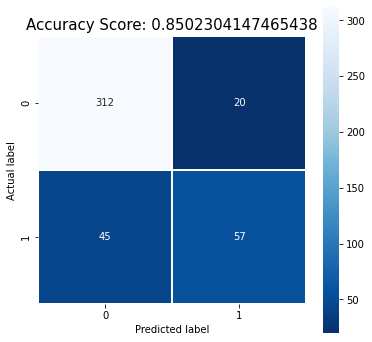

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

done, no longer improving

## ROC curves

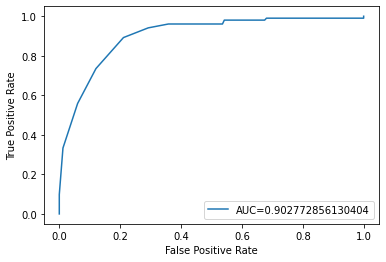

In [ ]:
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  prediction[:,1])
auc = metrics.roc_auc_score(Y_test,  prediction[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#XGBOOST

In [ ]:
!pip install xgboost

In [ ]:
#removing continuous 
intersection_set = set.intersection(set(df_PFAS.columns), set(binary_df.columns))
intersection_list = list(intersection_set)

In [ ]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [ ]:
cols_to_drop

[]

In [ ]:
X_train

,SEQN,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
1600,80569.0,0.4,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
2321,83659.0,0.9,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.5,0.0,0.07,1.0,0.07,1.0
1523,80238.0,0.7,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
860,77305.0,4.4,0.0,1.10,0.0,0.07,1.0,0.07,1.0,0.4,0.0,0.10,0.0,0.07,1.0
830,77189.0,1.4,0.0,0.07,1.0,0.07,1.0,0.10,0.0,0.5,0.0,0.07,1.0,0.07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,78920.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.6,0.0,0.07,1.0,0.07,1.0
630,76302.0,1.2,0.0,0.20,0.0,0.07,1.0,0.07,1.0,1.2,0.0,0.30,0.0,0.20,0.0
1941,82047.0,1.5,0.0,0.10,0.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
2240,83329.0,0.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.6,0.0,0.07,1.0,0.07,1.0


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict_proba(X_test)
predictions = [round(value) for value in y_pred[:,1]]
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)

0.8525345622119815


## Roc curve

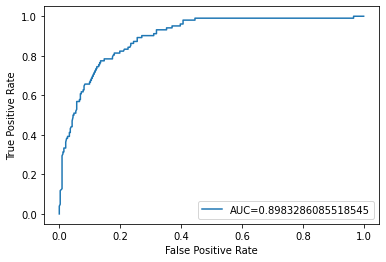

In [ ]:
#ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test,  y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

area is lower*

In [ ]:
X_train

,SEQN,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
1600,80569.0,0.4,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
2321,83659.0,0.9,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.5,0.0,0.07,1.0,0.07,1.0
1523,80238.0,0.7,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
860,77305.0,4.4,0.0,1.10,0.0,0.07,1.0,0.07,1.0,0.4,0.0,0.10,0.0,0.07,1.0
830,77189.0,1.4,0.0,0.07,1.0,0.07,1.0,0.10,0.0,0.5,0.0,0.07,1.0,0.07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,78920.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.6,0.0,0.07,1.0,0.07,1.0
630,76302.0,1.2,0.0,0.20,0.0,0.07,1.0,0.07,1.0,1.2,0.0,0.30,0.0,0.20,0.0
1941,82047.0,1.5,0.0,0.10,0.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
2240,83329.0,0.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.6,0.0,0.07,1.0,0.07,1.0


#Random Forest

[Classification with Random Forests in Python
](https://towardsdatascience.com/classification-with-random-forests-in-python-29b8381680ed)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
# create regressor object
regressor = RandomForestClassifier(random_state = 0)
 
#fit the regressor with x and y data
regressor.fit(X_train, Y_train) 
#Prediction = regressor.predict_proba(X_test)
y_pred = regressor.predict_proba(X_test)
prediction = [round(value) for value in y_pred[:,1]]

In [ ]:
print(prediction)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [ ]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.8202764976958525 % correct


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[300  32]
 [ 46  56]]


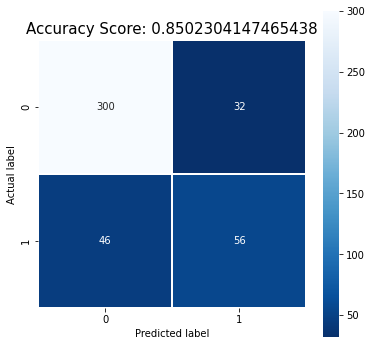

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

In [ ]:
metrics.f1_score(Y_test,prediction)

0.5894736842105264

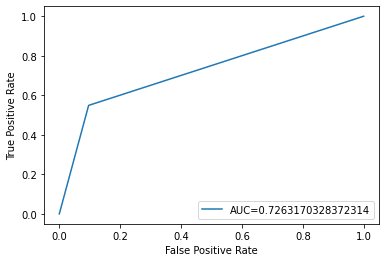

In [ ]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  prediction)
auc = metrics.roc_auc_score(Y_test, prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Nearest Neighbors

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_KNN = sc.fit_transform(X_train)
X_test_KNN = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_KNN, Y_train)
y_pred = classifier.predict_proba(X_test_KNN)
prediction = [round(value) for value in y_pred[:,1]]

In [ ]:
print(prediction)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 

In [ ]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.783410138248848 % correct


In [ ]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[287  45]
 [ 49  53]]


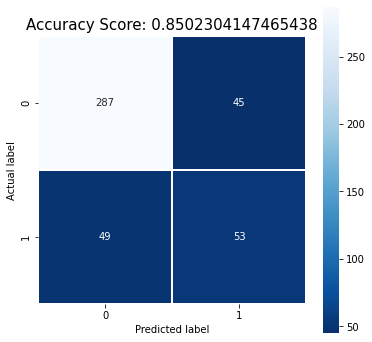

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

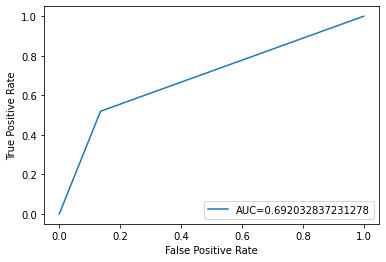

In [ ]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  prediction)
auc = metrics.roc_auc_score(Y_test, prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#KNN-did k=5

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_KNN = sc.fit_transform(X_train)
X_test_KNN = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_KNN, Y_train)
y_pred = classifier.predict_proba(X_test_KNN)
prediction = [round(value) for value in y_pred[:,1]]

In [ ]:
print(prediction)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 

In [ ]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.7949308755760369 % correct


In [ ]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[301  31]
 [ 58  44]]


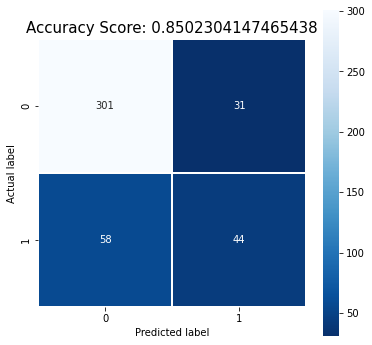

In [ ]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

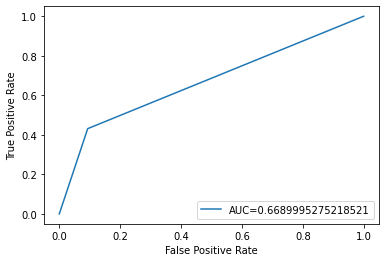

In [ ]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  prediction)
auc = metrics.roc_auc_score(Y_test, prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Lasso Regression

[Lasso Regression with Python](https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train_scaled, Y_train)

Lasso(alpha=1)

In [ ]:
print('R squared training set', round(reg.score(X_train_scaled, Y_train)*100, 2))
print('R squared test set', round(reg.score(X_test_scaled, Y_test)*100, 2))

R squared training set 0.0
R squared test set -0.55


In [ ]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test_scaled)
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 0.16
MSE test set 0.18


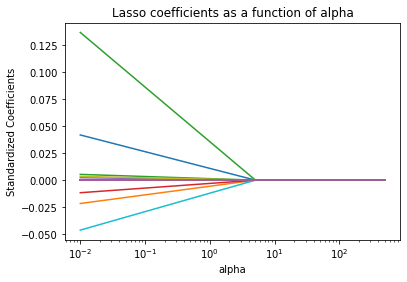

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [ ]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train_scaled, Y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [ ]:
model.alpha_


0.001519214186388349

In [ ]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train_scaled, Y_train)

Lasso(alpha=0.001519214186388349)

In [ ]:
Lasso(alpha=0.001519214186388349)

Lasso(alpha=0.001519214186388349)

In [ ]:
print(list(zip(lasso_best.coef_, X_train)))

[(-0.005708594559242484, 'SEQN'), (-0.025989786574877376, 'LBXPFHS'), (0.00964639052985347, 'LBDPFHSL'), (-0.016982498406970192, 'LBXMPAH'), (0.006119760588581045, 'LBDMPAHL'), (0.0, 'LBXPFBS'), (-0.0022464813953975986, 'LBDPFBSL'), (0.006524558665746255, 'LBXPFHP'), (0.01402336415822052, 'LBDPFHPL'), (-0.05219899793838459, 'LBXPFNA'), (0.0447402706973555, 'LBDPFNAL'), (0.009852246432913728, 'LBXPFUA'), (0.1426785073928292, 'LBDPFUAL'), (0.0, 'LBXPFDO'), (-0.005370031486196311, 'LBDPFDOL')]


In [ ]:
print('R squared training set', round(lasso_best.score(X_train_scaled, Y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test_scaled, Y_test)*100, 2))

R squared training set 23.92
R squared test set 20.58


In [ ]:
mean_squared_error(Y_test, lasso_best.predict(X_test_scaled))

0.14279375088258411

run ROC curve instead!!!

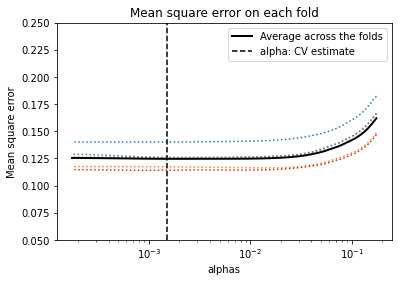

In [ ]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0.05, 0.25
plt.ylim(ymin, ymax);

In [ ]:
reg = Lasso(alpha=0.001519214186388349)
reg.fit(X_train_scaled, Y_train)
y_pred=reg.predict_proba(X_test_scaled)

AttributeError: ignored

#LDA

[Comparison of LDA and PCA 2D projection of Iris dataset](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py)

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
LinearDiscriminantAnalysis()
y_pred=clf.predict_proba(X_test)
prediction = [round(value) for value in y_pred[:,1]]
print(prediction)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.7811059907834101 % correct


In [ ]:
X=df_PFAS.drop(columns=['LBDPFDEL','LBXPFDE'])
y=df_PFAS['LBDPFDEL']

In [ ]:
X_r = clf.fit(X, y).transform(X)

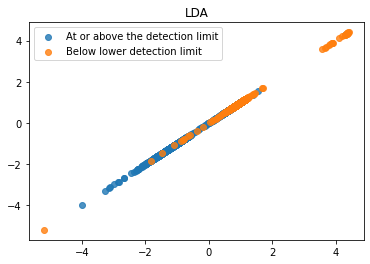

In [ ]:
plt.figure()
labels = ['At or above the detection limit','Below lower detection limit']
for i,label in zip([0, 1],labels):
    plt.scatter(
        X_r[y == i], X_r[y == i], alpha=0.8, label=label
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA")

plt.show()

horrible

##LDA– first attempt

[Linear Discriminant Analysis in Python (Step-by-Step)](https://www.statology.org/linear-discriminant-analysis-in-python/)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [ ]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print(np.mean(scores)) 

0.8071176885130374


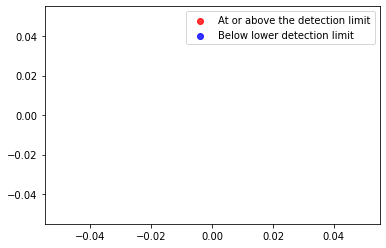

In [ ]:
plt.figure()
colors = ['red', 'blue']
lw = 2
target_names=['At or above the detection limit','Below lower detection limit']
data_plot = model.fit(X_train, Y_train).transform(X_test)
for i in [0, 1], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

In [ ]:
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

#SVM!

# Bayesian Ridge Regression?

#Naive Bayes?